In [2]:
import re
import json
import json_repair
import pandas as pd
import pickle as pkl

from pathlib import Path
from pdb import set_trace

In [9]:
data_path = Path("../data/raw/framing_results/")    

In [10]:
def get_valid_json_list(data):
    out_list = []
    for i, out in enumerate(data):
        try:
            # Check if json is already valid within brackets
            basic_fix_str = out[out.index("{"):out.rindex("}")+1]
            basic_fix_str = basic_fix_str.replace("\n","")
            json_obj = json.loads(basic_fix_str)
            assert type(json_obj) == dict
            assert len(json_obj) == 2
        except:
            # Fix json
            try:
                json_obj = json_repair.loads(out)
                assert len(json_obj) == 2
                assert type(json_obj) == dict
            except:
                out_list.append({"error": "json_out_dict error"})
                continue
        assert type(json_obj) == dict
        out_list.append(json_obj)
    return out_list

In [12]:
me_df = []
for i in range(1,len([*data_path.glob("UK*")])):
    data = pkl.load(open(data_path/f"UK_{i}.pkl", "rb"))
    print(len(data), end=",")
    me_df.extend(get_valid_json_list(data))

500,100,200,200,200,200,200,200,200,200,200,200,200,

In [13]:
len(me_df)

2800

In [14]:
me_list = []
for i, json_out in enumerate(me_df):
    json_out_list = list(json_out.values())
    try:
        json_out_dict = json_out_list[0] | json_out_list[1]
        assert len(json_out_dict) == len(json_out_list[0])+len(json_out_list[1])
        json_out_dict["index"] = i
    except:
        continue
    me_list.append(json_out_dict)

In [15]:
print(me_list[0].keys())

dict_keys(['adversarial_frame', 'focus_on_elites', 'labelling_of_people', 'language', 'partisan_framing', 'focus_on_visible_effects_of_war', 'nationalistic_frame', 'military_solution', 'peace_frame', 'focus_on_invisible_effects_of_war', 'peace_orientation', 'people_orientation', 'victim_orientation', 'index'])


In [16]:
me_df = pd.DataFrame(me_list)

In [17]:
valid_columns = []
df_len = len(me_df)
for col_name,col in me_df.items():
    if col.isna().sum() > 0.5*df_len:
        continue
    else:
        valid_columns.append(col_name)

In [18]:
me_df = me_df[valid_columns]

In [19]:
me_df

,adversarial_frame,focus_on_elites,labelling_of_people,language,partisan_framing,focus_on_visible_effects_of_war,nationalistic_frame,military_solution,peace_frame,focus_on_invisible_effects_of_war,peace_orientation,people_orientation,victim_orientation,index
0,{'use_of_adversarial_language': [['clashes nea...,[The article primarily focuses on the statemen...,[[referring to 'the Jewish community' and 'Mus...,{'demonizing_language': [['referring to Hamas ...,[[Albanese accusing Dutton of 'weaponising ant...,[The article mentions clashes near a synagogue...,{'emphasis_on_national_interests': [['Albanese...,[[Albanese stating that Hamas is not a partner...,{'focus_on_consequences_of_conflict': [['MPs e...,[[Zoe Daniel expressing concern about the risi...,[[Albanese discussing the postwar future of Ga...,[[Zoe Daniel expressing concern about civilian...,[[Zoe Daniel expressing concern about antisemi...,0
1,{'attribution_of_blame': [['lockdowns limited ...,"[Michael O’Leary, Ryanair’s chief executive, N...",[],"{'demonizing_language': [], 'dehumanizing_lang...",[],[],"{'emphasis_on_national_interests': [], 'portra...",[],{'focus_on_consequences_of_conflict': [['Ukrai...,[],[],[],[],2
2,{'use_of_adversarial_language': [['Labour’s wo...,"[Keir Starmer, Rishi Sunak, Boris Johnson, Sir...","[[right-wing party, Reform UK, Uses a label th...","{'demonizing_language': [], 'dehumanizing_lang...",[[the Tories were “staring defeat in the face ...,[],"{'emphasis_on_national_interests': [], 'portra...",[],"{'focus_on_consequences_of_conflict': [], 'inc...",[],[],"[[voters, Focus on the actions and opinions of...",[],3
3,{'use_of_adversarial_language': [['anti-Semiti...,[English Defence League founder Tommy Robinson...,[[English Defence League founder Tommy Robinso...,{'demonizing_language': [['anti-Semitic banner...,[[English Defence League founder Tommy Robinso...,[434 people have been arrested for a range of ...,{'emphasis_on_national_interests': [['The marc...,[The march came after 18 demonstrators were ar...,{'focus_on_consequences_of_conflict': [['The o...,[[The ongoing conflict in the Middle East cont...,[[a separate rally calling for a permanent cea...,[[a journalist and her colleagues were harasse...,[[The ongoing conflict in the Middle East cont...,4
4,{'use_of_adversarial_language': [['Israeli for...,"[Israeli Prime Minister Benjamin Netanyahu, Is...","[[Hamas militants, Hamas, Labels Hamas members...","{'demonizing_language': [['crush Hamas', 'Hama...",[[Israel vows to crush Hamas after its Oct. 7 ...,[[one of the most devastating military campaig...,{'emphasis_on_national_interests': [['Israel v...,[[Israel has vowed to continue fighting to eli...,{'focus_on_consequences_of_conflict': [['Despi...,[[The children are terrified. We are terrified...,"[[international pressure for a cease-fire, Int...","[[More than 20,600 Palestinians, two-thirds of...","[[More than 20,600 Palestinians, two-thirds of...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,{'use_of_adversarial_language': [['Gay sparked...,"[Harvard president Claudine Gay, Gay's remarks...","[['antisemitic scandal', Gay's comments, The l...",{'demonizing_language': [['Gay sparked widespr...,[[Harvard president Claudine Gay has finally i...,[Footage shared to social media appearing to s...,{'emphasis_on_national_interests': [['The Whit...,NaN,{'focus_on_consequences_of_conflict': [['Amid ...,[['It was an opportunity to just convey the de...,[['Let me be clear: Calls for violence or geno...,[[The hearing also saw widely criticized testi...,"[[Amid national outrage, Gay issued a highly c...",2794
2488,{'use_of_adversarial_language': [[''politicisi...,"[Carla Efstratiou, a social media commentator ...","[['woke' presenters, Presenters with perceived...","{'demonizing_language': [], 'dehumanizing_lang...",[[Carla Efstratiou... said it was inevitable t...,[],{'emphasis_on_national_interests': [['Sydney L...,[],{'focus_on_consequences_of_conflict': [[''[The...,[['[T

In [22]:
all_me = pd.read_csv("../data/raw/framing_results/selected_MiddleEast.csv")

In [23]:
# map the ME_df data to the all_me data using the "index" column in me_df
me_df.columns

Index(['adversarial_frame', 'focus_on_elites', 'labelling_of_people',
       'language', 'partisan_framing', 'focus_on_visible_effects_of_war',
       'nationalistic_frame', 'military_solution', 'peace_frame',
       'focus_on_invisible_effects_of_war', 'peace_orientation',
       'people_orientation', 'victim_orientation', 'index'],
      dtype='object')

In [24]:
# reset me_df index, using index column and concatenate the dataframes me_df and me based on the index 
me_df.reset_index()
me_df = me_df.rename(columns={"index": "index"})
me_df = me_df.set_index("index")

In [25]:
# select the rows from all_me with index values same as the index values in me_df 
all_me_new = all_me.loc[me_df.index]
# concatenate all_me_new with me_df
all_me_new_df = pd.concat([all_me_new, me_df], axis=1)

In [26]:
all_me_new_df.shape

(2492, 23)

In [27]:
all_me_new_df.columns

Index(['description', 'maintext', 'source_domain', 'title', 'url', 'language',
       'date_publish', 'region', 'title_len', 'text_len', 'adversarial_frame',
       'focus_on_elites', 'labelling_of_people', 'language',
       'partisan_framing', 'focus_on_visible_effects_of_war',
       'nationalistic_frame', 'military_solution', 'peace_frame',
       'focus_on_invisible_effects_of_war', 'peace_orientation',
       'people_orientation', 'victim_orientation'],
      dtype='object')

### War journalism indicators

In [ ]:
from collections import Counter

war_indicators = all_me_new_df[['adversarial_frame',
       'focus_on_elites', 'labelling_of_people', 'language',
       'partisan_framing', 'focus_on_visible_effects_of_war',
       'nationalistic_frame', 'military_solution']] 
peace_indicators = all_me_new_df[['peace_frame', 'focus_on_invisible_effects_of_war', 'people_orientation', 'victim_orientation']]


def recursive_count(data):
    key, value = data.items()
    if isinstance(value, list):
        return {key: len(value)}
    elif isinstance(data, dict):
        _, sub_value = recursive_count(value)
        return {key: len(value) + sub_value}
        
def flatten_and_count(df):
    for i, row in df.iterrows():
        result = recursive_count(row)
    return Counter({col_name: recursive_count(col_values) for col_name, col_values in df.items()})

In [31]:
war_counts = flatten_and_count(war_indicators)
war_counts

Counter({'adversarial_frame': Counter(),
         'focus_on_elites': Counter(),
         'labelling_of_people': Counter(),
         'language': Counter(),
         'partisan_framing': Counter(),
         'focus_on_visible_effects_of_war': Counter(),
         'nationalistic_frame': Counter(),
         'military_solution': Counter()})

In [173]:
war_summary.Count.sum()

0

In [171]:
peace_summary.Count.sum()

np.int64(16651)

In [119]:
all_me_new_df.head()

,description,maintext,source_domain,title,url,language,date_publish,region,title_len,text_len,...,language,partisan_framing,focus_on_visible_effects_of_war,nationalistic_frame,military_solution,peace_frame,focus_on_invisible_effects_of_war,peace_orientation,people_orientation,victim_orientation
index,,,,,,,,,,,,,,,,,,,,,
1,The first group of hostages released by Hamas ...,CNN —\nThe first group of hostages released by...,www.egyptindependent.com,Who are the hostages released on Friday?,https://www.egyptindependent.com/who-are-the-h...,en,2023-11-25 13:17:16,ME,7,1026,...,{'demonizing_language': [['brutal cross-border...,[[The first group of hostages released by Hama...,[13 Israeli women and children were held capti...,{'emphasis_on_national_interests': [['13 Israe...,"[Israel Defense Forces spokesman, Israeli mili...",{'focus_on_consequences_of_conflict': [['civil...,"[[endured a long and agonizing wait, Families ...","[[first group of hostages released, Hamas and ...","[[13 Israeli women and children, Israeli civil...","[[civilians held captive, Israeli civilians, D..."
2,NaN,"Damascus, SANA- Syria denounced Saturday that ...",sana.sy,Foreign Ministry: “Israel” commits ethnic clea...,https://sana.sy/en/?p=318608,en,2023-10-14 18:14:07,ME,9,207,...,"{'demonizing_language': [['ethnic cleansing', ...",[[Syria denounced ... that 'Israel' has adopte...,[The article focuses on the potential displace...,{'emphasis_on_national_interests': [['Syria re...,"[While not explicitly stated, the article impl...",{'focus_on_consequences_of_conflict': [['displ...,"[[the tragedy of 1948, Palestinians, Reference...","[[the right to return to their land, Palestini...","[[the people of Gaza, numbered 2.3 million Pal...","[[ethnic cleansing of the Palestinians, Palest..."
3,The Hamas movement issued a statement praising...,The Hamas movement issued a statement praising...,www.egyptindependent.com,Hamas hails Egypt's stance on the Philadelphia...,https://www.egyptindependent.com/hamas-hails-e...,en,2024-01-26 05:05:52,ME,8,259,...,"{'demonizing_language': [], 'dehumanizing_lang...",[[The Hamas movement issued a statement praisi...,[],{'emphasis_on_national_interests': [['defendin...,"[[occupying the Philadelphia axis, Israel, Imp...",{'focus_on_consequences_of_conflict': [['stopp...,[],[],[[supporting and assisting our Palestinian peo...,"[[stopping the brutal aggression, Palestinian ..."
4,"TEHRAN, Nov. 08 (MNA) – The United States has ...",White House National Security Council spokesma...,en.mehrnews.com,US says still not drawing any red lines for Is...,https://en.mehrnews.com/news/208113/US-says-st...,en,2023-11-08 07:46:40,ME,10,278,...,"{'demonizing_language': [['genocidal war', 'Is...",[[a surprise attack against the occupying enti...,"[civilian fatalities, airstrikes, death toll, ...",{'emphasis_on_national_interests': [['The Unit...,"[military assistance package, US government, S...",{'focus_on_consequences_of_conflict': [['civil...,"[[consequences"": [""trauma, displacement, loss ...","[[prospect of suspending or reducing its aid, ...","[[civilian fatalities, civilian population, Ce...","[[mounting civilian fatalities, Israeli airstr..."
5,"TEHRAN, Oct. 11 (MNA) – The Al-Aqsa Storm, the...",The lack of preparation of the Israeli regime'...,en.mehrnews.com,Why the Israeli regime fears activation of Wes...,https://en.mehrnews.com/news/206987/Why-the-Is...,en,2023-10-11 07:47:57,ME,9,484,...,{'demonizing_language': [['caused more than a ...,[[The lack of preparation of the Israeli regim...,[caused more than a thousand Zionists to be ki...,{'emphasis_on_national_interests': [['Without ...,[Hamas launched an incredibly complex and soph...,{'focus_on_consequences_of_conflict': [['cause...,[[the vulnerability is an issue that has been ...,[],"[[A journalist has said, Journalist's perspect...",[]


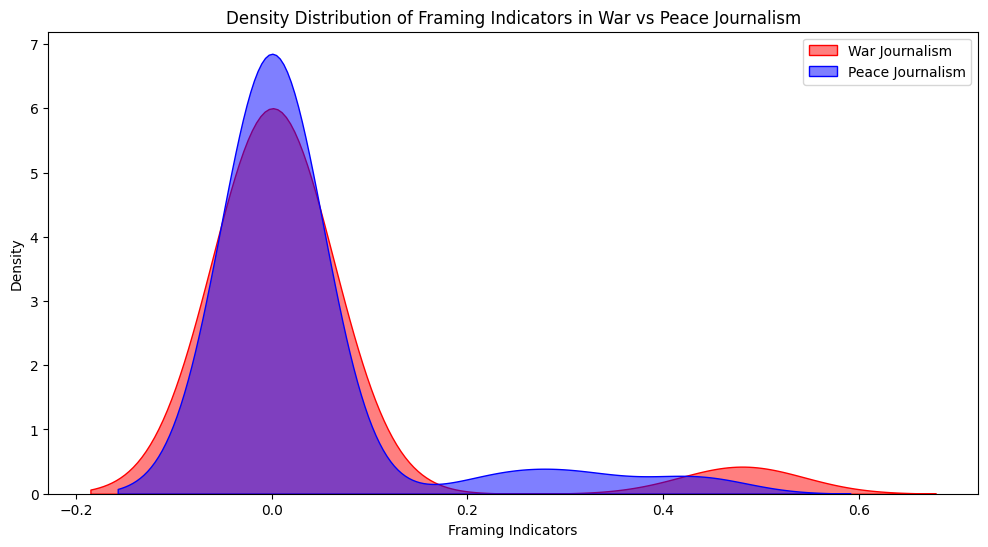

In [151]:
# Calculate proportions
combined_summary['Proportion_War'] = combined_summary['Count_War'] / combined_summary['Count_War'].sum()
combined_summary['Proportion_Peace'] = combined_summary['Count_Peace'] / combined_summary['Count_Peace'].sum()

# Create Density Plot
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(combined_summary['Proportion_War'], label='War Journalism', fill=True, color='red', alpha=0.5)
sns.kdeplot(combined_summary['Proportion_Peace'], label='Peace Journalism', fill=True, color='blue', alpha=0.5)

plt.xlabel('Framing Indicators')
plt.ylabel('Density')
plt.title('Density Distribution of Framing Indicators in War vs Peace Journalism')
plt.legend()
plt.show()

In [153]:
peace_counts

Counter({'focus_on_consequences_of_conflict': 7227,
         'representation_of_multiple_perspectives': 5240,
         'inclusion_of_peace_proposals': 3953,
         'representation_of multiple_perspectives': 54,
         'people_orientation': 50,
         'victim_orientation': 42,
         'peace_orientation': 33,
         'focus_on_invisible_effects_of_war': 26,
         'representation_ofmultiple_perspectives': 19,
         'inclusion_of peace_proposals': 3,
         'The inclusion of peace proposals or alternatives to conflict", "None specifically", "None identified in the article."]\n      ],\n      "people_orientation': 2,
         'focus_consequences_of_conflict': 2,
         'No explicit peace proposals are included in the article."],\n      ["N/A"],\n      ["The article does not offer any suggestions for peaceful resolution or improvement of the issues discussed.': 0,
         'inclusion_ofpeace_proposals': 0,
         'I haven’t yet administered stitches to someone in need, b

In [159]:
nested_list = all_me_new_df["language"].values
nested_list_updated = [item[1] for item in nested_list]
nested_list_updated

[{'demonizing_language': [["referring to Hamas as 'not a potential partner for peace'",
    'Hamas',
    'By stating that Hamas is not interested in peace, the article portrays them as an enemy or a demonized entity.'],
   ["accusations of Dutton 'weaponising antisemitism'",
    'Peter Dutton',
    'The phrasing suggests that Dutton is exploiting antisemitism for political gain, portraying him as unscrupulous and demonizing his actions.']],
  'victimizing_language': [["referring to 'threats, anger and hate' faced by MPs",
    'MPs',
    'The language portrays the MPs as victims of threatening and hateful behavior.'],
   ["feeling 'heartsick' at civilian deaths in Gaza",
    'Zoe Daniel',
    "Daniel's emotional response to the deaths portrays her as a victim of the tragedy, feeling helpless to influence events."],
   ['expressing concern about the rising anxiety of Jewish people',
    'Jewish community',
    'The phrasing suggests that the Jewish community is vulnerable and at risk, po

In [166]:
nested_list_updated

[{'demonizing_language': [["referring to Hamas as 'not a potential partner for peace'",
    'Hamas',
    'By stating that Hamas is not interested in peace, the article portrays them as an enemy or a demonized entity.'],
   ["accusations of Dutton 'weaponising antisemitism'",
    'Peter Dutton',
    'The phrasing suggests that Dutton is exploiting antisemitism for political gain, portraying him as unscrupulous and demonizing his actions.']],
  'victimizing_language': [["referring to 'threats, anger and hate' faced by MPs",
    'MPs',
    'The language portrays the MPs as victims of threatening and hateful behavior.'],
   ["feeling 'heartsick' at civilian deaths in Gaza",
    'Zoe Daniel',
    "Daniel's emotional response to the deaths portrays her as a victim of the tragedy, feeling helpless to influence events."],
   ['expressing concern about the rising anxiety of Jewish people',
    'Jewish community',
    'The phrasing suggests that the Jewish community is vulnerable and at risk, po

{'demonizing_language': [["referring to Hamas as 'not a potential partner for peace'", 'Hamas', 'By stating that Hamas is not interested in peace, the article portrays them as an enemy or a demonized entity.'], ["accusations of Dutton 'weaponising antisemitism'", 'Peter Dutton', 'The phrasing suggests that Dutton is exploiting antisemitism for political gain, portraying him as unscrupulous and demonizing his actions.']], 'victimizing_language': [["referring to 'threats, anger and hate' faced by MPs", 'MPs', 'The language portrays the MPs as victims of threatening and hateful behavior.'], ["feeling 'heartsick' at civilian deaths in Gaza", 'Zoe Daniel', "Daniel's emotional response to the deaths portrays her as a victim of the tragedy, feeling helpless to influence events."], ['expressing concern about the rising anxiety of Jewish people', 'Jewish community', 'The phrasing suggests that the Jewish community is vulnerable and at risk, positioning them as victims.'], ["referring to synagog

IndexError: list index out of range